In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Point
from folium.features import GeoJson
import pandas as pd
from folium.plugins import MarkerCluster

In [7]:
zones_shapefile_path = '../data/raw/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp'

# Load the shapefile
gdf = gpd.read_file(zones_shapefile_path)
gdf = gdf[gdf['STE_NAME21'] == 'Victoria']

# Display the first few records to understand its structure and ensure data is loaded correctly
gdf.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
644,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
645,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,12.3787,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
646,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,51.5855,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
647,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,34.1607,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.75050 -37.59119, 143.75044 -37.5..."
648,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,104.7274,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."


In [8]:
# Load the dataset
file_path = '../data/raw/2021Census_G13A_VIC_SA2.csv'
data = pd.read_csv(file_path)
lang_data = data[['SA2_CODE_2021', 'MOL_CL_Mandarin_Tot', 'MOL_IAL_Punjabi_Tot', 'MOL_IAL_Hindi_Tot']]
lang_data.rename(columns={'SA2_CODE_2021': 'SA2_CODE21'}, inplace=True)
lang_data.head()

/tmp/ipykernel_20947/1983873367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_data.rename(columns={'SA2_CODE_2021': 'SA2_CODE21'}, inplace=True)


,SA2_CODE21,MOL_CL_Mandarin_Tot,MOL_IAL_Punjabi_Tot,MOL_IAL_Hindi_Tot
0,201011001,141,109,80
1,201011002,92,30,16
2,201011005,12,11,10
3,201011006,27,94,26
4,201011007,0,0,0


In [10]:
# Converting the SA2_CODE21 columns in both datasets to string before merging
gdf['SA2_CODE21'] = gdf['SA2_CODE21'].astype(str)
lang_data['SA2_CODE21'] = lang_data['SA2_CODE21'].astype(str)

# Merging the two datasets on SA2_CODE21
merged_data = gdf.merge(lang_data, on='SA2_CODE21', how='left')
merged_data.head()

/tmp/ipykernel_20947/872306550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_data['SA2_CODE21'] = lang_data['SA2_CODE21'].astype(str)


,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry,MOL_CL_Mandarin_Tot,MOL_IAL_Punjabi_Tot,MOL_IAL_Hindi_Tot
0,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",141,109,80
1,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,12.3787,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",92,30,16
2,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,51.5855,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6...",12,11,10
3,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,34.1607,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.75050 -37.59119, 143.75044 -37.5...",27,94,26
4,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,104.7274,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6...",0,0,0


In [14]:
merged_data = merged_data[~merged_data['geometry'].isna()]

# Create a base map centered around Melbourne (approximate center of Victoria)
map_center = [-37.8136, 144.9631]  # Melbourne center
m = folium.Map(location=map_center, zoom_start=10)

# Define a color scale based on the frequency of Mandarin speakers
colormap = folium.LinearColormap(
    colors=['green', 'yellow', 'orange', 'red'],
    vmin=merged_data['MOL_CL_Mandarin_Tot'].min(),
    vmax=merged_data['MOL_CL_Mandarin_Tot'].max(),
    caption='Mandarin Speakers Frequency'
)

# Add zones (polygons) to the map for Victoria, colored by Mandarin frequency
for _, row in merged_data.iterrows():
    if row['geometry'] is not None and not row['geometry'].is_empty:
        folium.GeoJson(
            row['geometry'],
            style_function=lambda feature, row=row: {
                'fillColor': colormap(row['MOL_CL_Mandarin_Tot']),
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            tooltip=f"SA2: {row['SA2_NAME21']}, Mandarin Speakers: {row['MOL_CL_Mandarin_Tot']}"
        ).add_to(m)

# Add the color legend to the map
colormap.add_to(m)

# Add layer control to toggle zones and stations
folium.LayerControl().add_to(m)

# Save the map to an HTML file
#m.save('plot/mandarin_frequency_victoria_map.html')
#m

In [15]:
top_sa2 = merged_data[['SA2_NAME21', 'MOL_CL_Mandarin_Tot']].sort_values(by='MOL_CL_Mandarin_Tot', ascending=False).head(20)
top_sa2

,SA2_NAME21,MOL_CL_Mandarin_Tot
184,Box Hill,2948
136,Melbourne CBD - North,2454
177,Doncaster,2430
385,Glen Waverley - East,2401
386,Glen Waverley - West,2357
166,Balwyn North,1875
185,Box Hill North,1674
165,Balwyn,1526
391,Wheelers Hill,1524
181,Doncaster East - South,1493


Extract the Mandarin speaking communities then rank using the livability score dataset, and find forecasted rental price using the forecast dataset.

In [30]:
# Coordinates for the five ranked locations with their ranking
locations = {
    "1 - Glen Waverley": [-37.8788, 145.1647],
    "2 - Mount Waverley": [-37.8766, 145.1281],
    "3 - Balwyn": [-37.8090, 145.0820],
    "4 - Box Hill": [-37.8183, 145.1255],
    "5 - Doncaster": [-37.7861, 145.1238]
}

# Create a base map centered around Melbourne (approximate center of Victoria)
map_center = [-37.8136, 144.9631]  # Melbourne center
m = folium.Map(location=map_center, zoom_start=10)

# Define a color scale based on the frequency of Mandarin speakers
colormap = folium.LinearColormap(
    colors=['green', 'yellow', 'orange', 'red'],
    vmin=merged_data['MOL_CL_Mandarin_Tot'].min(),
    vmax=merged_data['MOL_CL_Mandarin_Tot'].max(),
    caption='Mandarin Speakers Frequency'
)

# Add zones (polygons) to the map for Victoria, colored by Mandarin frequency
for _, row in merged_data.iterrows():
    if row['geometry'] is not None and not row['geometry'].is_empty:
        folium.GeoJson(
            row['geometry'],
            style_function=lambda feature, row=row: {
                'fillColor': colormap(row['MOL_CL_Mandarin_Tot']),
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            tooltip=f"SA2: {row['SA2_NAME21']}, Mandarin Speakers: {row['MOL_CL_Mandarin_Tot']}"
        ).add_to(m)

# Add markers for the ranked locations
for location, coords in locations.items():
    folium.Marker(
        location=coords,
        popup=location,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add the color legend to the map
colormap.add_to(m)

# Add layer control to toggle zones and stations
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('../plots/mandarin_frequency_victoria_map.html')


Remove '#' below to view the interactive heatmap

In [32]:
#m

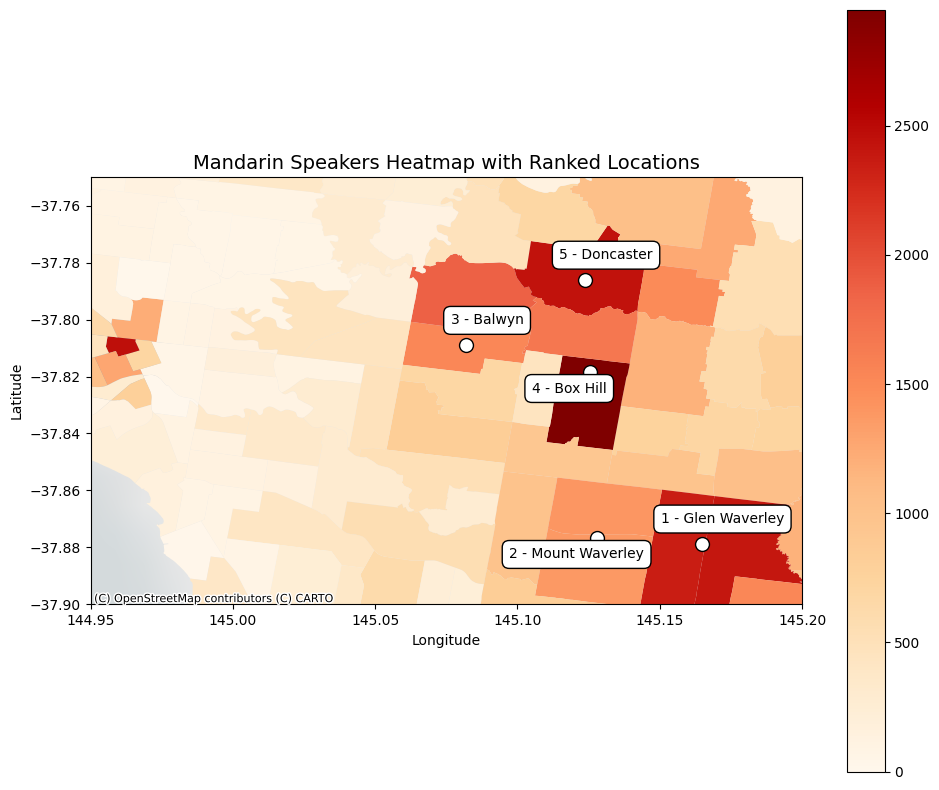

In [29]:
# For displaying on the workbook
# Convert locations to a GeoDataFrame for plotting
location_gdf = gpd.GeoDataFrame(
    list(locations.items()),
    columns=["Location", "Coordinates"],
    geometry=gpd.points_from_xy([coords[1] for coords in locations.values()], [coords[0] for coords in locations.values()])
)

# Plot the base map with Mandarin frequency as a choropleth
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap using Mandarin speakers' frequency
merged_data.plot(column='MOL_CL_Mandarin_Tot', cmap='OrRd', legend=True, ax=ax)

# Plot the ranked locations with white dots
location_gdf.plot(ax=ax, color='white', marker='o', markersize=100, edgecolor='black')

# Annotate the locations with their ranking, placing text at different positions to avoid overlap
for i, row in location_gdf.iterrows():
    # Adjust text placement based on the index to avoid overlapping
    if i % 2 == 0:
        # Even index: text to the right and above the dot
        xytext_offset = (15, 15)
    else:
        # Odd index: text to the left and below the dot
        xytext_offset = (-15, -15)
    
    plt.annotate(
        row['Location'], 
        xy=(row.geometry.x, row.geometry.y), 
        xytext=xytext_offset,  # Dynamic offset for different text placement
        textcoords="offset points",
        fontsize=10, 
        color='black',
        ha='center',  # Center text horizontally to avoid blocking other elements
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Add a background box to text
    )

# Add a basemap to provide geographic context
ctx.add_basemap(ax, crs=merged_data.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Zoom into a specific area
ax.set_xlim([144.95, 145.2])  
ax.set_ylim([-37.9, -37.75])  

# Set plot labels and title
plt.title('Mandarin Speakers Heatmap with Ranked Locations', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot
plt.tight_layout()
plt.savefig('plot/avg_rent_overtime.png')
plt.show()